# Demo 1: Suicidios en india.
### Importación de bibliotecas

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importación de los datos.

In [58]:
df = pd.read_csv("../../Datasets/suicides-in-india/Suicides in India 2001-2012.csv")

print("Shape: ",df.shape)

df.head(3)

Shape:  (237519, 7)


,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0


### Valores nulos

In [59]:
df.isna().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

### Columnas

In [60]:
df.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

### Estados donde hubieron suicidios

Total de estados:  38

Estados donde hay suicidios:  38

Cantidad de instancias que no son suicidio:  135481

Cantidad de instancias que son suicidio:  102038


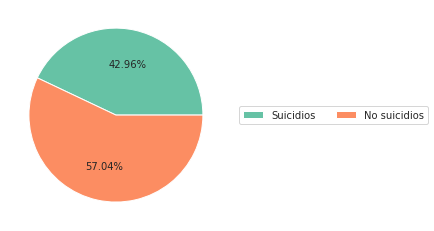

In [61]:
states = df['State'].unique()

print("Total de estados: ", len(states))

suicides_filtered = df['Total'] > 0

df_filter = df[suicides_filtered]

is_suicide = df_filter.shape[0]

no_suicide =  df.shape[0] - is_suicide

print("\nEstados donde hay suicidios: ",len(df_filter.State.unique()))
print("\nCantidad de instancias que no son suicidio: ", no_suicide )
print("\nCantidad de instancias que son suicidio: ", is_suicide )

plt.pie([is_suicide, no_suicide ], autopct='%1.2f%%', )
plt.legend(["Suicidios", "No suicidios"], loc='center', ncol=2, bbox_to_anchor=(1.5,0.5))

### Algunos estadisticos

In [62]:
df.describe()

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


### Generos

In [63]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

/home/xavi/Virtual/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/xavi/Virtual/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


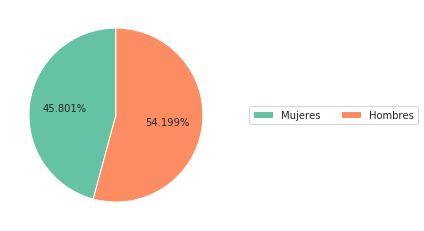

In [64]:
female_values = df_filter[df.Gender == "Female"].Gender.value_counts().tolist()[0]
male_values = df_filter[df.Gender != "Female"].Gender.value_counts().tolist()[0]

plt.pie([female_values, male_values], 
        autopct='%1.3f%%', startangle=90)
plt.legend(["Mujeres", "Hombres"], loc='center', ncol=2, bbox_to_anchor=(1.5,0.5))

### Grupos de edades 

In [65]:
df_filter.Age_group.unique()

array(['0-14', '15-29', '30-44', '45-59', '60+', '0-100+'], dtype=object)

### Tipos de ciscunstancias

In [66]:
df_filter.Type_code.unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

### Tipos Generales

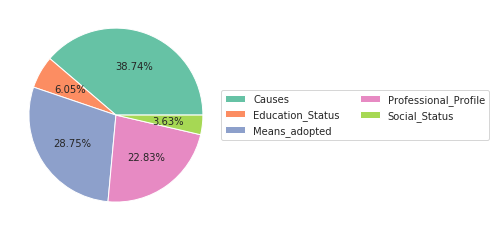

In [67]:
type_code = df_filter.Type_code.unique()

group = df_filter.groupby(['Type_code', 'Type']).size()


vals = []
for x in type_code: vals.append(group[x].values.sum())
plt.pie(vals, autopct='%1.2f%%')
plt.legend(type_code, loc='center', ncol=2, bbox_to_anchor=(1.6,0.5))

#### Suicidios por cada tipo general

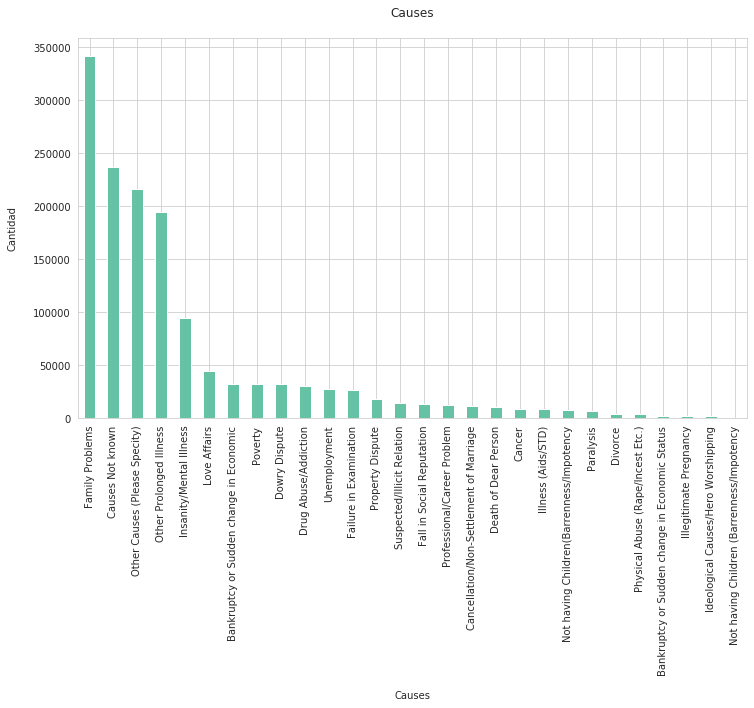

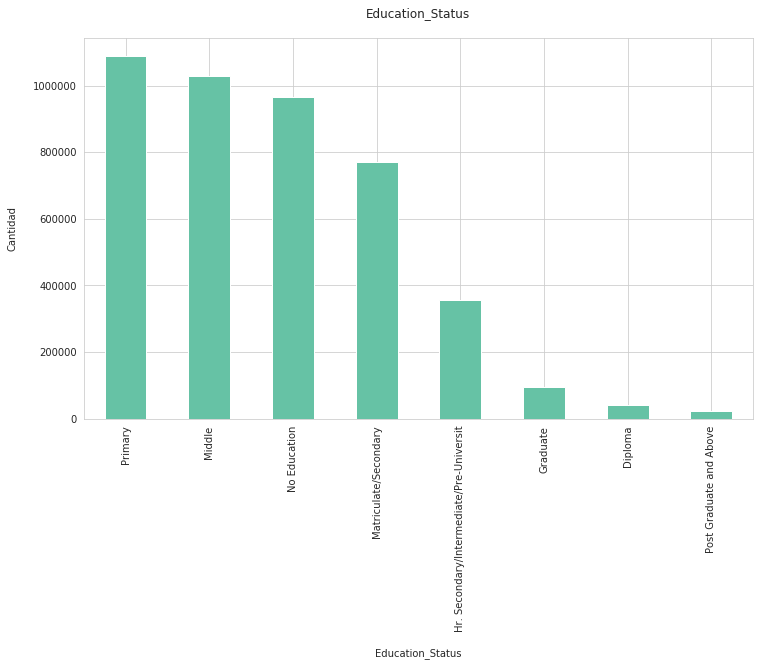

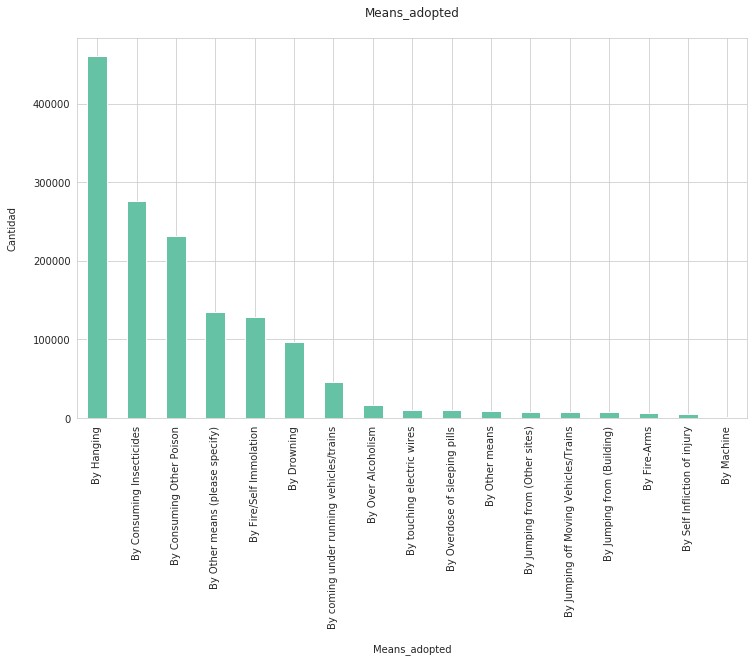

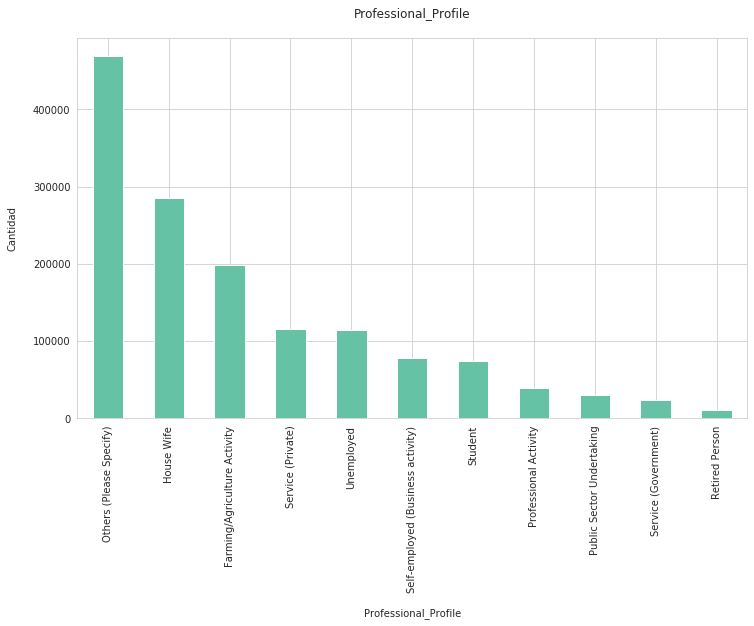

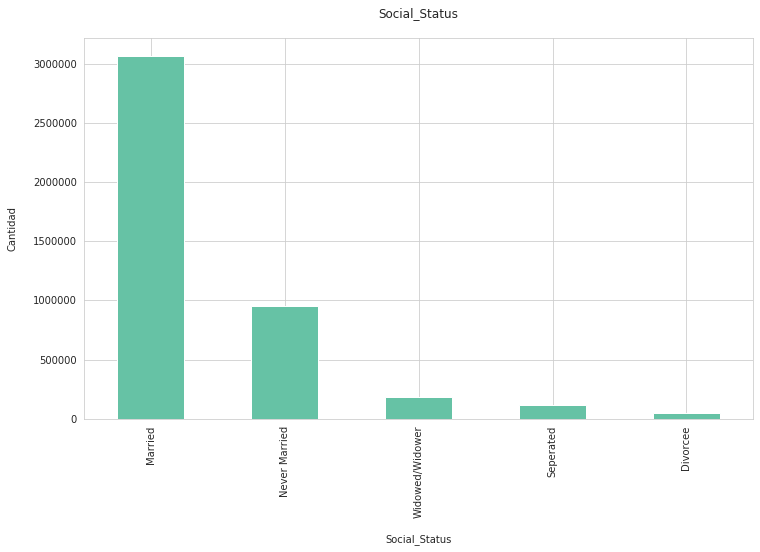

In [68]:
def graph(df, tag, gruop_value, plot_type, sort_values = True):
    group_type = df.groupby(gruop_value).sum()['Total']
    
    if sort_values:
        group_type = group_type.sort_values(ascending= False)
    
    fig = group_type.plot(plot_type, figsize = (12,7), title = tag + '\n')
    fig.set_xlabel('\n' + tag )
    fig.set_ylabel('Cantidad\n')
    sns.set_style('whitegrid')
    sns.set_palette('Set2');
    plt.show()

df_array = []
for x in type_code: df_array.append(df_filter[df_filter['Type_code'] == x])

j = 0
for i in df_array: 
    graph(i, type_code[j], 'Type', 'bar')
    j+=1

#### Rango de edades

['0-14' '15-29' '30-44' '45-59' '60+' '0-100+']


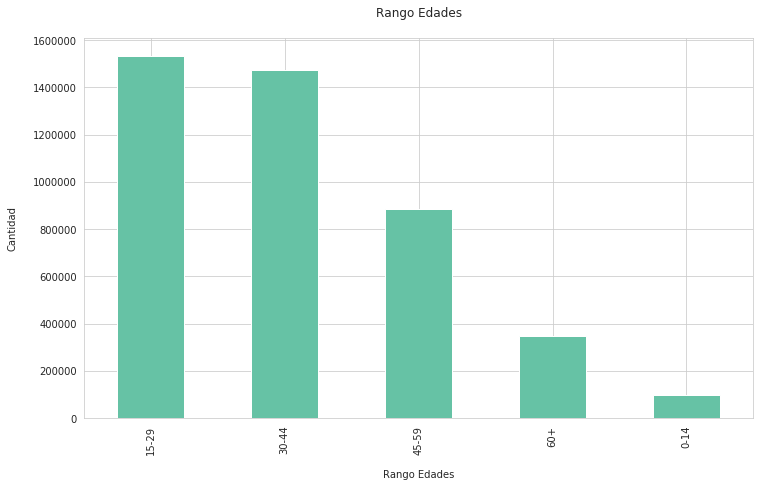

In [69]:
age_group = df_filter['Age_group'].unique()
print(age_group)

df_age = df_filter[df_filter.Age_group != age_group[-1]]
graph(df_age, 'Rango Edades', 'Age_group', 'bar')

#### Años de insidencias

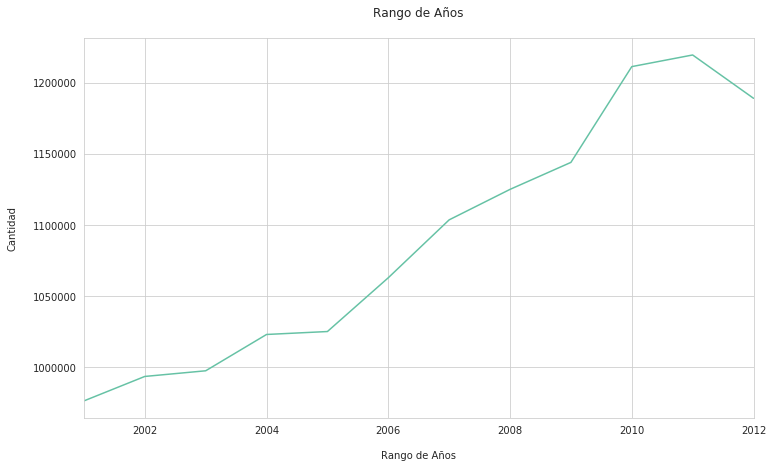

In [70]:
graph(df_filter, 'Rango de Años', 'Year', 'line', False)